In [ ]:
# !pip install gensim

In [241]:
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
labels_df = pd.read_csv('trainLabels.csv')

In [243]:
print(labels_df.shape)
labels_df.head()

(49999, 34)


,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [244]:
labels_df.drop(columns=['id'], inplace=True)
labels_df.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [245]:
labels_df['labels'] = labels_df.idxmax(1)
labels_df.head() 

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y25,y26,y27,y28,y29,y30,y31,y32,y33,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,y33
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,y32
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,y3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,y33
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,y33


In [246]:
labels_df_processed = labels_df.drop(labels_df.iloc[:,0:33], axis=1)

In [247]:
print(labels_df_processed.shape)
labels_df_processed.head() 

(49999, 1)


,labels
0,y33
1,y32
2,y3
3,y33
4,y33


In [248]:
train_df = pd.read_csv('train.csv')

In [249]:
print(train_df.shape)
train_df.head() 

(9999, 146)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045


In [250]:
test_df = pd.read_csv('test.csv')

In [251]:
print(test_df.shape)
test_df.head()

(1999, 146)


,1698001,NO,NO.1,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.41479820627803,0,1,0.1,0.202060221870048,...,0.30,1.8,1262.3,892.3,NO.36,NO.37,NO.38,0.31,0.0896860986547085,0.193343898573693.1
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
2,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278


In [252]:
dataset_df = train_df.join(labels_df_processed)

In [253]:
print(dataset_df.shape)
dataset_df.head()

(9999, 147)


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x137,x138,x139,x140,x141,x142,x143,x144,x145,labels
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610,y33
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630,y32
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159,y3
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582,y33
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045,y33


In [254]:
dataset_df.count()

id        9999
x1        8573
x2        8573
x3        8573
x4        8573
          ... 
x142      9999
x143      9999
x144      9999
x145      9999
labels    9999
Length: 147, dtype: int64

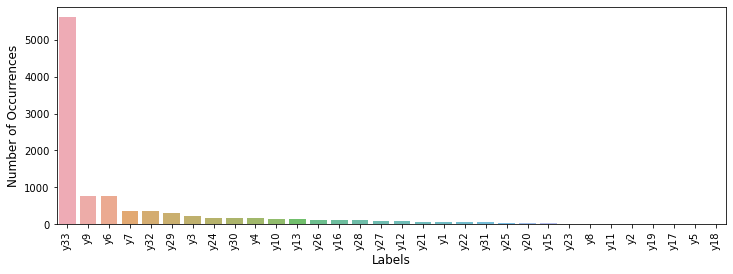

In [255]:
cnt_pro = dataset_df['labels'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Labels', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [256]:
train_df.isna().sum()

id         0
x1      1426
x2      1426
x3      1426
x4      1426
        ... 
x141       0
x142       0
x143       0
x144       0
x145       0
Length: 146, dtype: int64

In [257]:
train_df.shape

(9999, 146)

In [258]:
train_df.dtypes

id        int64
x1       object
x2       object
x3       object
x4       object
         ...   
x141     object
x142     object
x143      int64
x144    float64
x145    float64
Length: 146, dtype: object

In [259]:
train_df.dropna(inplace=True)

In [260]:
train_df

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045
5,6,NO,NO,cz26ErvsEb3tZqeaIlmLIwjn8D7YVXYynSLV1WltcUk=,olN1LoaeSyI8h+udI/jquozrw4R8YQ+cVwHq1dOUO5s=,1.413677,0.000000,1.000000,0.000000,0.667724,...,0.0,1.000,1261,892,YES,NO,YES,2,0.263453,0.659001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,NO,NO,jComfqYTXYSeH3GvqcOhwPmldb+BCdVJDKKDNkdtw2w=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,1.207136,0.082855,0.918960,0.313880,0.495189,...,0.0,0.810,4677,3307,YES,NO,YES,1,0.502268,0.486637
9995,9996,NO,NO,Pr5enXjzVzVjZziZxrDcgnyu6CLUftmEbnp6TctyJbU=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,1.414798,0.000000,1.000000,0.000000,0.357369,...,0.0,1.000,1262,892,YES,NO,YES,15,0.890135,0.346276
9996,9997,YES,YES,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,1.413677,0.000000,1.000000,0.000000,0.668517,...,0.0,1.000,1261,892,YES,NO,YES,5,0.726457,0.659001
9997,9998,NO,NO,9zkXU3f6YnRPjsWi3lKSCLseIGrleg00tpRI4OplABw=,gOZBAoajyr6i7GgON0N7q5+KE4JTwH3OUM0lZOWMuG8=,1.294118,0.000000,1.000000,0.000000,0.570707,...,1.0,1.000,1188,918,NO,NO,NO,3,0.450980,0.561448


In [261]:
train_df["x3"][0]

'dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8='

In [262]:
dfcat = train_df.select_dtypes("object")

In [263]:
dfnum=train_df.select_dtypes(["int64", "float64"])

In [264]:
dfcat.iloc[0, :]

x1                                                NO
x2                                                NO
x3      dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=
x4      GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=
x10                                              YES
x11                                               NO
x12                                               NO
x13                                               NO
x14                                               NO
x24                                              YES
x25                                               NO
x26                                              YES
x30                                               NO
x31                                               NO
x32                                               NO
x33                                               NO
x34     mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=
x35     s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=
x41                                           

In [265]:
dfcat.shape

(7402, 60)

In [266]:
test_df

,1698001,NO,NO.1,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.41479820627803,0,1,0.1,0.202060221870048,...,0.30,1.8,1262.3,892.3,NO.36,NO.37,NO.38,0.31,0.0896860986547085,0.193343898573693.1
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
2,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1699996,NO,NO,Z6vucL/W0MPoFsgu2ewNXrvNCAQFiKzUJTYuqh6lP28=,yhI9Bw5Q8l1vEll4sw/Tem/jojpE9KwjKvQQIyrAqgU=,1.294118,0.000000,1.000000,0.000000,0.164141,...,0.0,1.000000,1188,918,YES,NO,YES,2,0.198257,0.155724
1995,1699997,NO,NO,LKQ9Uh6tQ3ZrIxAKaPaDEuiYFunnK/2d+oKAfpN9tuY=,h0cPLYjd7nmw9FJsQA+KUsnChH0SajbHjNdfMk47k9o=,1.020217,0.583944,0.625842,1.003516,0.791136,...,0.0,0.720000,4400,3413,YES,NO,YES,0,0.582479,0.778864
1996,1699998,NO,NO,/tuZYGMsFx4A/Ou+jSol6t/TpLRkSl8Ku+1tnQPvwww=,aLEeZ8ZFKt2jQfkG5e9Nmad+QJlfpPmSfQS3CHlL6Ik=,0.354706,0.550882,0.930882,0.207941,0.207500,...,0.0,0.845000,4400,3400,NO,NO,NO,5,0.930588,0.201591
1997,1699999,NO,NO,uMIU2KDOxlgzhYToCFCa3nMxIOPV0WqCnKWfooGaw+8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.220588,0.102059,0.326176,1.213824,0.942955,...,1.5,0.676667,4400,3400,NO,NO,NO,2,0.256471,0.938182


In [267]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
oe=OrdinalEncoder()

In [268]:
dfcat=oe.fit_transform(dfcat)
dfcat

array([[0.000e+00, 0.000e+00, 2.725e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 3.027e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 8.740e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 1.000e+00, 7.040e+02, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 7.560e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.515e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [269]:
dfnum = dfnum.values

In [270]:
dfcat

array([[0.000e+00, 0.000e+00, 2.725e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 3.027e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 8.740e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 1.000e+00, 7.040e+02, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 7.560e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.515e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [271]:
df_train = np.hstack((dfcat, dfnum))

In [272]:
df_train

array([[0.00000000e+00, 0.00000000e+00, 2.72500000e+03, ...,
        2.00000000e+00, 3.75534645e-01, 4.64609800e-01],
       [0.00000000e+00, 0.00000000e+00, 3.02700000e+03, ...,
        1.00000000e+00, 7.76467030e-01, 4.93159470e-01],
       [1.00000000e+00, 0.00000000e+00, 8.74000000e+02, ...,
        3.00000000e+00, 1.68234288e-01, 5.46581972e-01],
       ...,
       [1.00000000e+00, 1.00000000e+00, 7.04000000e+02, ...,
        5.00000000e+00, 7.26457399e-01, 6.59000793e-01],
       [0.00000000e+00, 0.00000000e+00, 7.56000000e+02, ...,
        3.00000000e+00, 4.50980392e-01, 5.61447811e-01],
       [1.00000000e+00, 1.00000000e+00, 1.51500000e+03, ...,
        0.00000000e+00, 6.04273504e-01, 4.99395405e-01]])

In [273]:
labels_df_processed

,labels
0,y33
1,y32
2,y3
3,y33
4,y33
...,...
49994,y33
49995,y33
49996,y33
49997,y33


In [274]:
df=pd.DataFrame(df_train)
df

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,0.0,0.0,2725.0,207.0,1.0,0.0,0.0,0.0,0.0,1.0,...,5.0,6.0,0.987596,0.0,0.810,3306.0,4676.0,2.0,0.375535,0.464610
1,0.0,0.0,3027.0,412.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,5.0,0.966122,0.0,0.850,4678.0,3306.0,1.0,0.776467,0.493159
2,1.0,0.0,874.0,422.0,1.0,0.0,0.0,0.0,0.0,1.0,...,17.0,15.0,0.927550,0.0,0.945,3306.0,4678.0,3.0,0.168234,0.546582
3,0.0,0.0,1859.0,70.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.0,11.0,0.900224,0.0,1.000,1263.0,892.0,1.0,0.246637,0.361045
4,0.0,0.0,2662.0,588.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,7.0,0.881166,0.0,1.000,1261.0,892.0,2.0,0.263453,0.659001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7397,0.0,0.0,3080.0,261.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,7.0,0.971575,0.0,0.810,4677.0,3307.0,1.0,0.502268,0.486637
7398,0.0,0.0,1745.0,430.0,1.0,0.0,0.0,0.0,0.0,1.0,...,11.0,17.0,0.933857,0.0,1.000,1262.0,892.0,15.0,0.890135,0.346276
7399,1.0,1.0,704.0,405.0,1.0,0.0,0.0,0.0,0.0,1.0,...,6.0,7.0,0.945067,0.0,1.000,1261.0,892.0,5.0,0.726457,0.659001
7400,0.0,0.0,756.0,511.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,11.0,0.860566,1.0,1.000,1188.0,918.0,3.0,0.450980,0.561448


In [275]:
df_train1 = df.join(labels_df_processed)
df_train1 

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,labels
0,0.0,0.0,2725.0,207.0,1.0,0.0,0.0,0.0,0.0,1.0,...,6.0,0.987596,0.0,0.810,3306.0,4676.0,2.0,0.375535,0.464610,y33
1,0.0,0.0,3027.0,412.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,0.966122,0.0,0.850,4678.0,3306.0,1.0,0.776467,0.493159,y32
2,1.0,0.0,874.0,422.0,1.0,0.0,0.0,0.0,0.0,1.0,...,15.0,0.927550,0.0,0.945,3306.0,4678.0,3.0,0.168234,0.546582,y3
3,0.0,0.0,1859.0,70.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.0,0.900224,0.0,1.000,1263.0,892.0,1.0,0.246637,0.361045,y33
4,0.0,0.0,2662.0,588.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.881166,0.0,1.000,1261.0,892.0,2.0,0.263453,0.659001,y33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7397,0.0,0.0,3080.0,261.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.971575,0.0,0.810,4677.0,3307.0,1.0,0.502268,0.486637,y30
7398,0.0,0.0,1745.0,430.0,1.0,0.0,0.0,0.0,0.0,1.0,...,17.0,0.933857,0.0,1.000,1262.0,892.0,15.0,0.890135,0.346276,y6
7399,1.0,1.0,704.0,405.0,1.0,0.0,0.0,0.0,0.0,1.0,...,7.0,0.945067,0.0,1.000,1261.0,892.0,5.0,0.726457,0.659001,y33
7400,0.0,0.0,756.0,511.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.860566,1.0,1.000,1188.0,918.0,3.0,0.450980,0.561448,y6


In [276]:
x=df_train1.iloc[:,:-1]
y=df_train1.iloc[:,-1]

In [277]:
y

0       y33
1       y32
2        y3
3       y33
4       y33
       ... 
7397    y30
7398     y6
7399    y33
7400     y6
7401    y33
Name: labels, Length: 7402, dtype: object

In [278]:
x.shape

(7402, 146)

In [279]:
y.shape

(7402,)

In [280]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [281]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(Xtrain)
xtest = sc.transform(Xtest)

In [282]:
from sklearn.metrics import accuracy_score

In [283]:
import warnings
warnings.filterwarnings("ignore") 

In [284]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest, ypred)) 

In [285]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.neighbors import KNeighborsClassifier as KNC

In [286]:
logreg = LR()
svm = SVC()
ada = ABC()
knn = KNC()


In [287]:
mymodel(knn)

0.48671769473210263


In [288]:
mymodel(logreg)

0.5411976587122918


In [289]:
ac = []
for i in range(1,31):
    knn = KNC(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    acs = accuracy_score(ytest, ypred)
    ac.append(acs)

In [290]:
import matplotlib.pyplot as plt


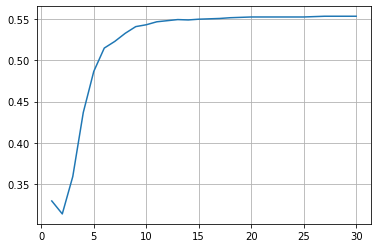

In [291]:
plt.plot(range(1,31), ac)
plt.grid(True)

In [292]:
mymodel(logreg) 

0.5411976587122918


In [293]:
mymodel(svm)

0.5533543448896894


In [294]:
mymodel(ada)

0.5515533543448897


In [295]:
from sklearn.decomposition import PCA

In [296]:
pca_model=PCA(n_components=2)

In [297]:
xtrainp=pca_model.fit_transform(xtrain)
xtestp =pca_model.transform(xtest)

In [298]:
xtrain

array([[-0.34985761, -0.27203855,  0.09947259, ..., -0.23574772,
         1.79015259, -0.00354497],
       [-0.34985761, -0.27203855,  0.61245358, ..., -0.46496962,
        -0.72030253, -1.0743585 ],
       [-0.34985761, -0.27203855, -0.37137954, ...,  0.56652895,
        -0.11741814,  1.42766338],
       ...,
       [-0.34985761, -0.27203855,  0.01191061, ..., -0.35035867,
         0.2603848 , -0.05728024],
       [-0.34985761, -0.27203855, -1.31556195, ..., -0.12113676,
        -0.77711678, -0.42484876],
       [-0.34985761, -0.27203855, -0.49528799, ..., -0.46496962,
         0.72090922,  0.44221139]])

In [299]:
mymodel(logreg)

0.5411976587122918


In [300]:
mymodel(svm)

0.5533543448896894


In [301]:
mymodel(knn)

0.5538045925258892


In [302]:
mymodel(ada)

0.5515533543448897


In [303]:
test_df = pd.read_csv('test.csv')
test_df

,1698001,NO,NO.1,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.41479820627803,0,1,0.1,0.202060221870048,...,0.30,1.8,1262.3,892.3,NO.36,NO.37,NO.38,0.31,0.0896860986547085,0.193343898573693.1
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
2,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1699996,NO,NO,Z6vucL/W0MPoFsgu2ewNXrvNCAQFiKzUJTYuqh6lP28=,yhI9Bw5Q8l1vEll4sw/Tem/jojpE9KwjKvQQIyrAqgU=,1.294118,0.000000,1.000000,0.000000,0.164141,...,0.0,1.000000,1188,918,YES,NO,YES,2,0.198257,0.155724
1995,1699997,NO,NO,LKQ9Uh6tQ3ZrIxAKaPaDEuiYFunnK/2d+oKAfpN9tuY=,h0cPLYjd7nmw9FJsQA+KUsnChH0SajbHjNdfMk47k9o=,1.020217,0.583944,0.625842,1.003516,0.791136,...,0.0,0.720000,4400,3413,YES,NO,YES,0,0.582479,0.778864
1996,1699998,NO,NO,/tuZYGMsFx4A/Ou+jSol6t/TpLRkSl8Ku+1tnQPvwww=,aLEeZ8ZFKt2jQfkG5e9Nmad+QJlfpPmSfQS3CHlL6Ik=,0.354706,0.550882,0.930882,0.207941,0.207500,...,0.0,0.845000,4400,3400,NO,NO,NO,5,0.930588,0.201591
1997,1699999,NO,NO,uMIU2KDOxlgzhYToCFCa3nMxIOPV0WqCnKWfooGaw+8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.220588,0.102059,0.326176,1.213824,0.942955,...,1.5,0.676667,4400,3400,NO,NO,NO,2,0.256471,0.938182


In [304]:
test_df.dropna(inplace=True)

In [305]:
test_df

,1698001,NO,NO.1,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.41479820627803,0,1,0.1,0.202060221870048,...,0.30,1.8,1262.3,892.3,NO.36,NO.37,NO.38,0.31,0.0896860986547085,0.193343898573693.1
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278
5,1698007,NO,NO,NMFPnlbm6YWoxpG5KdcfdDMWWSZ7FYAUlJoLtkBBf9k=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.414798,0.000000,1.000000,0.000000,0.323296,...,-1.0,1.000000,1262,892,YES,YES,YES,2,0.863229,0.323296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,1699994,NO,NO,X/hdUOVR5KuExVGLzjhLcM2CyIqym9t0Nh+ZX05M+1w=,+yhSY//Hpg7u0bSA7NYmcmRFgv3bF4Tw3BMHrBqaTtA=,1.415919,0.000000,1.000000,0.000000,0.297704,...,0.0,1.000000,1263,892,NO,NO,NO,11,0.809417,0.288203
1994,1699996,NO,NO,Z6vucL/W0MPoFsgu2ewNXrvNCAQFiKzUJTYuqh6lP28=,yhI9Bw5Q8l1vEll4sw/Tem/jojpE9KwjKvQQIyrAqgU=,1.294118,0.000000,1.000000,0.000000,0.164141,...,0.0,1.000000,1188,918,YES,NO,YES,2,0.198257,0.155724
1995,1699997,NO,NO,LKQ9Uh6tQ3ZrIxAKaPaDEuiYFunnK/2d+oKAfpN9tuY=,h0cPLYjd7nmw9FJsQA+KUsnChH0SajbHjNdfMk47k9o=,1.020217,0.583944,0.625842,1.003516,0.791136,...,0.0,0.720000,4400,3413,YES,NO,YES,0,0.582479,0.778864
1996,1699998,NO,NO,/tuZYGMsFx4A/Ou+jSol6t/TpLRkSl8Ku+1tnQPvwww=,aLEeZ8ZFKt2jQfkG5e9Nmad+QJlfpPmSfQS3CHlL6Ik=,0.354706,0.550882,0.930882,0.207941,0.207500,...,0.0,0.845000,4400,3400,NO,NO,NO,5,0.930588,0.201591


In [306]:
dfcat = test_df.select_dtypes("object")

In [307]:
dfcat

,NO,NO.1,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,NO.2,NO.3,NO.4,NO.5,NO.6,NO.7,...,Unnamed: 116,Unnamed: 117,NO.31,NO.32,NO.33,NO.34,NO.35,NO.36,NO.37,NO.38
0,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,YES,NO,NO,NO,NO,YES,...,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO
1,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,NO,NO,YES,YES,YES,NO,...,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
3,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,NO,NO,NO,NO,NO,NO,...,NO,NO,YES,NO,YES,NO,YES,YES,NO,YES
4,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,NO,NO,YES,NO,NO,NO,...,NO,YES,YES,NO,YES,NO,YES,YES,NO,YES
5,NO,NO,NMFPnlbm6YWoxpG5KdcfdDMWWSZ7FYAUlJoLtkBBf9k=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,NO,NO,YES,NO,NO,NO,...,NO,NO,YES,NO,NO,NO,NO,YES,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,NO,NO,X/hdUOVR5KuExVGLzjhLcM2CyIqym9t0Nh+ZX05M+1w=,+yhSY//Hpg7u0bSA7NYmcmRFgv3bF4Tw3BMHrBqaTtA=,YES,NO,YES,NO,YES,YES,...,YES,YES,NO,NO,YES,NO,NO,NO,NO,NO
1994,NO,NO,Z6vucL/W0MPoFsgu2ewNXrvNCAQFiKzUJTYuqh6lP28=,yhI9Bw5Q8l1vEll4sw/Tem/jojpE9KwjKvQQIyrAqgU=,YES,NO,NO,NO,NO,YES,...,NO,YES,YES,NO,NO,NO,YES,YES,NO,YES
1995,NO,NO,LKQ9Uh6tQ3ZrIxAKaPaDEuiYFunnK/2d+oKAfpN9tuY=,h0cPLYjd7nmw9FJsQA+KUsnChH0SajbHjNdfMk47k9o=,YES,NO,NO,NO,NO,YES,...,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES
1996,NO,NO,/tuZYGMsFx4A/Ou+jSol6t/TpLRkSl8Ku+1tnQPvwww=,aLEeZ8ZFKt2jQfkG5e9Nmad+QJlfpPmSfQS3CHlL6Ik=,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [308]:
dfnum=test_df.select_dtypes(["int64", "float64"])

In [309]:
dfnum

,1698001,1.41479820627803,0,1,0.1,0.202060221870048,4,0.0964125560538117,28,2,...,6.1,2.1,0.963004484304933,0.30,1.8,1262.3,892.3,0.31,0.0896860986547085,0.193343898573693.1
0,1698002,0.832679,0.049834,0.945938,0.317427,0.482021,3,0.895500,6,7,...,17,7,0.876992,1.0,0.866667,4672,3311,5,0.945032,0.471318
1,1698003,1.415919,0.000000,1.000000,0.000000,0.703088,4,0.536996,2,10,...,9,10,0.919283,-1.0,1.000000,1263,892,8,0.557175,0.693587
3,1698005,1.129212,0.087020,0.814240,1.112804,0.874318,5,0.238793,3,10,...,1,10,0.996484,0.0,0.870000,4400,3413,2,0.224729,0.870909
4,1698006,1.415919,0.000000,1.000000,0.000000,0.232779,2,0.516816,2,8,...,7,8,0.939462,0.0,1.000000,1263,892,6,0.536996,0.223278
5,1698007,1.414798,0.000000,1.000000,0.000000,0.323296,1,0.828475,4,4,...,10,4,0.928251,-1.0,1.000000,1262,892,2,0.863229,0.323296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,1699994,1.415919,0.000000,1.000000,0.000000,0.297704,3,0.819507,1,13,...,4,13,0.959641,0.0,1.000000,1263,892,11,0.809417,0.288203
1994,1699996,1.294118,0.000000,1.000000,0.000000,0.164141,4,0.174292,3,3,...,8,3,0.944444,0.0,1.000000,1188,918,2,0.198257,0.155724
1995,1699997,1.020217,0.583944,0.625842,1.003516,0.791136,2,0.583944,4,1,...,5,5,0.949604,0.0,0.720000,4400,3413,0,0.582479,0.778864
1996,1699998,0.354706,0.550882,0.930882,0.207941,0.207500,6,0.910882,4,13,...,7,13,0.972104,0.0,0.845000,4400,3400,5,0.930588,0.201591


In [311]:
dfcat=oe.fit_transform(dfcat)
dfcat

array([[  0.,   0., 185., ...,   0.,   0.,   0.],
       [  0.,   0., 387., ...,   0.,   0.,   0.],
       [  0.,   0., 991., ...,   1.,   0.,   1.],
       ...,
       [  0.,   0., 358., ...,   1.,   0.,   1.],
       [  0.,   0.,  30., ...,   0.,   0.,   0.],
       [  0.,   0., 983., ...,   0.,   0.,   0.]])

In [312]:
dfcat.shape

(1465, 60)

In [313]:
dfnum.shape

(1465, 86)

In [314]:
dfnum = dfnum.values

In [315]:
dfnum

array([[1.69800200e+06, 8.32678949e-01, 4.98338870e-02, ...,
        5.00000000e+00, 9.45031712e-01, 4.71318493e-01],
       [1.69800300e+06, 1.41591928e+00, 0.00000000e+00, ...,
        8.00000000e+00, 5.57174888e-01, 6.93586698e-01],
       [1.69800500e+06, 1.12921184e+00, 8.70202168e-02, ...,
        2.00000000e+00, 2.24728977e-01, 8.70909091e-01],
       ...,
       [1.69999700e+06, 1.02021682e+00, 5.83943745e-01, ...,
        0.00000000e+00, 5.82478758e-01, 7.78863636e-01],
       [1.69999800e+06, 3.54705882e-01, 5.50882353e-01, ...,
        5.00000000e+00, 9.30588235e-01, 2.01590909e-01],
       [1.69999900e+06, 1.22058824e+00, 1.02058824e-01, ...,
        2.00000000e+00, 2.56470588e-01, 9.38181818e-01]])

In [316]:
dftest = np.hstack((dfcat, dfnum))

In [317]:
model = ABC()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(accuracy_score(ytest, ypred))

0.5515533543448897


In [318]:
model.predict(dftest)

array(['y33', 'y33', 'y33', ..., 'y33', 'y33', 'y33'], dtype=object)

In [319]:
dftest

array([[0.00000000e+00, 0.00000000e+00, 1.85000000e+02, ...,
        5.00000000e+00, 9.45031712e-01, 4.71318493e-01],
       [0.00000000e+00, 0.00000000e+00, 3.87000000e+02, ...,
        8.00000000e+00, 5.57174888e-01, 6.93586698e-01],
       [0.00000000e+00, 0.00000000e+00, 9.91000000e+02, ...,
        2.00000000e+00, 2.24728977e-01, 8.70909091e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 3.58000000e+02, ...,
        0.00000000e+00, 5.82478758e-01, 7.78863636e-01],
       [0.00000000e+00, 0.00000000e+00, 3.00000000e+01, ...,
        5.00000000e+00, 9.30588235e-01, 2.01590909e-01],
       [0.00000000e+00, 0.00000000e+00, 9.83000000e+02, ...,
        2.00000000e+00, 2.56470588e-01, 9.38181818e-01]])

In [320]:
df = pd.DataFrame(dftest)

In [321]:
df["target"]=model.predict(dftest)

In [322]:
df

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,target
0,0.0,0.0,185.0,134.0,1.0,0.0,0.0,0.0,0.0,1.0,...,7.0,0.876992,1.0,0.866667,4672.0,3311.0,5.0,0.945032,0.471318,y33
1,0.0,0.0,387.0,228.0,0.0,0.0,1.0,1.0,1.0,0.0,...,10.0,0.919283,-1.0,1.000000,1263.0,892.0,8.0,0.557175,0.693587,y33
2,0.0,0.0,991.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.996484,0.0,0.870000,4400.0,3413.0,2.0,0.224729,0.870909,y33
3,0.0,0.0,821.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,...,8.0,0.939462,0.0,1.000000,1263.0,892.0,6.0,0.536996,0.223278,y33
4,0.0,0.0,394.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,0.928251,-1.0,1.000000,1262.0,892.0,2.0,0.863229,0.323296,y33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0.0,0.0,569.0,5.0,1.0,0.0,1.0,0.0,1.0,1.0,...,13.0,0.959641,0.0,1.000000,1263.0,892.0,11.0,0.809417,0.288203,y33
1461,0.0,0.0,620.0,244.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.944444,0.0,1.000000,1188.0,918.0,2.0,0.198257,0.155724,y33
1462,0.0,0.0,358.0,185.0,1.0,0.0,0.0,0.0,0.0,1.0,...,5.0,0.949604,0.0,0.720000,4400.0,3413.0,0.0,0.582479,0.778864,y33
1463,0.0,0.0,30.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.972104,0.0,0.845000,4400.0,3400.0,5.0,0.930588,0.201591,y33


In [324]:
df.to_csv("submission.csv")